In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"..\Cases\Glass Identification\Glass.csv")
le = LabelEncoder()
y = le.fit_transform(df['Type'])
X = df.drop('Type', axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24, stratify= y)

In [5]:
X_train.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [8]:
scaler = StandardScaler().set_output(transform="pandas")
prcomp = PCA(n_components=7).set_output(transform='pandas')
x_trn_scl = scaler.fit_transform(X_train)
X_trn_pca = prcomp.fit_transform(x_trn_scl)

In [9]:
print(np.cumsum(prcomp.explained_variance_ratio_))

[0.27798869 0.50632107 0.66379417 0.78836487 0.88605277 0.94456698
 0.99361411]


In [10]:
lr = LogisticRegression()
lr.fit(X_trn_pca, y_train)

LogisticRegression()

In [11]:
pipe = Pipeline([('SCL', scaler),('PCA', prcomp),('LR', lr)])
print(np.cumsum(prcomp.explained_variance_ratio_ * 100))

[27.79886944 50.63210658 66.37941685 78.83648726 88.60527685 94.45669828
 99.36141144]


In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('SCL', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('LR', LogisticRegression())])

In [13]:
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)
print(accuracy_score(y_test,y_pred ))
print(log_loss(y_test,y_pred_proba ))

0.6307692307692307
1.006994503889122


In [20]:
print(pipe.get_params())
params = {'PCA__n_components': [5,6,7,8,9],
          'LR__C': np.linspace(0.001, 3, 5),
          'LR__multi_class': ['ovr', 'multinomial']}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

gcv = GridSearchCV(pipe, param_grid=params, cv= kfold, scoring='neg_log_loss')

{'memory': None, 'steps': [('SCL', StandardScaler()), ('PCA', PCA(n_components=7)), ('LR', LogisticRegression())], 'verbose': False, 'SCL': StandardScaler(), 'PCA': PCA(n_components=7), 'LR': LogisticRegression(), 'SCL__copy': True, 'SCL__with_mean': True, 'SCL__with_std': True, 'PCA__copy': True, 'PCA__iterated_power': 'auto', 'PCA__n_components': 7, 'PCA__n_oversamples': 10, 'PCA__power_iteration_normalizer': 'auto', 'PCA__random_state': None, 'PCA__svd_solver': 'auto', 'PCA__tol': 0.0, 'PCA__whiten': False, 'LR__C': 1.0, 'LR__class_weight': None, 'LR__dual': False, 'LR__fit_intercept': True, 'LR__intercept_scaling': 1, 'LR__l1_ratio': None, 'LR__max_iter': 100, 'LR__multi_class': 'auto', 'LR__n_jobs': None, 'LR__penalty': 'l2', 'LR__random_state': None, 'LR__solver': 'lbfgs', 'LR__tol': 0.0001, 'LR__verbose': 0, 'LR__warm_start': False}


In [21]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('SCL', StandardScaler()),
                                       ('PCA', PCA(n_components=7)),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': array([1.00000e-03, 7.50750e-01, 1.50050e+00, 2.25025e+00, 3.00000e+00]),
                         'LR__multi_class': ['ovr', 'multinomial'],
                         'PCA__n_components': [5, 6, 7, 8, 9]},
             scoring='neg_log_loss')

In [22]:
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 0.75075, 'LR__multi_class': 'multinomial', 'PCA__n_components': 9}
-0.9546453344555609


In [24]:
nb = GaussianNB()
pipe1 = Pipeline([('SCL', scaler),('PCA', prcomp),('NB', nb)])

In [25]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('SCL', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('NB', GaussianNB())])

In [29]:
print(pipe.get_params())
params = {'PCA__n_components': [5,6,7,8,9],}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

gcv = GridSearchCV(pipe1, param_grid=params, cv= kfold, scoring='neg_log_loss')

{'memory': None, 'steps': [('SCL', StandardScaler()), ('PCA', PCA(n_components=7)), ('LR', LogisticRegression())], 'verbose': False, 'SCL': StandardScaler(), 'PCA': PCA(n_components=7), 'LR': LogisticRegression(), 'SCL__copy': True, 'SCL__with_mean': True, 'SCL__with_std': True, 'PCA__copy': True, 'PCA__iterated_power': 'auto', 'PCA__n_components': 7, 'PCA__n_oversamples': 10, 'PCA__power_iteration_normalizer': 'auto', 'PCA__random_state': None, 'PCA__svd_solver': 'auto', 'PCA__tol': 0.0, 'PCA__whiten': False, 'LR__C': 1.0, 'LR__class_weight': None, 'LR__dual': False, 'LR__fit_intercept': True, 'LR__intercept_scaling': 1, 'LR__l1_ratio': None, 'LR__max_iter': 100, 'LR__multi_class': 'auto', 'LR__n_jobs': None, 'LR__penalty': 'l2', 'LR__random_state': None, 'LR__solver': 'lbfgs', 'LR__tol': 0.0001, 'LR__verbose': 0, 'LR__warm_start': False}


In [30]:
gcv.fit(X,y)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: T

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('SCL', StandardScaler()),
                                       ('PCA', PCA(n_components=7)),
                                       ('NB', GaussianNB())]),
             param_grid={'PCA__n_components': [5, 6, 7, 8, 9]},
             scoring='neg_log_loss')

In [31]:
print(gcv.best_params_)
print(gcv.best_score_)

{'PCA__n_components': 5}
-1.788465112506398


In [33]:
rf = RandomForestClassifier()
pipe2 = Pipeline([('SCL', scaler),('PCA', prcomp),('RF', rf)])

In [34]:
pipe2.fit(X,y)

Pipeline(steps=[('SCL', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('RF', RandomForestClassifier())])

In [39]:
print(pipe.get_params())
params = {'PCA__n_components': [5,6,7,8,9],}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

gcv = GridSearchCV(pipe2, param_grid=params, cv= kfold, scoring='neg_log_loss')

{'memory': None, 'steps': [('SCL', StandardScaler()), ('PCA', PCA(n_components=7)), ('LR', LogisticRegression())], 'verbose': False, 'SCL': StandardScaler(), 'PCA': PCA(n_components=7), 'LR': LogisticRegression(), 'SCL__copy': True, 'SCL__with_mean': True, 'SCL__with_std': True, 'PCA__copy': True, 'PCA__iterated_power': 'auto', 'PCA__n_components': 7, 'PCA__n_oversamples': 10, 'PCA__power_iteration_normalizer': 'auto', 'PCA__random_state': None, 'PCA__svd_solver': 'auto', 'PCA__tol': 0.0, 'PCA__whiten': False, 'LR__C': 1.0, 'LR__class_weight': None, 'LR__dual': False, 'LR__fit_intercept': True, 'LR__intercept_scaling': 1, 'LR__l1_ratio': None, 'LR__max_iter': 100, 'LR__multi_class': 'auto', 'LR__n_jobs': None, 'LR__penalty': 'l2', 'LR__random_state': None, 'LR__solver': 'lbfgs', 'LR__tol': 0.0001, 'LR__verbose': 0, 'LR__warm_start': False}


In [40]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('SCL', StandardScaler()),
                                       ('PCA', PCA(n_components=7)),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'PCA__n_components': [5, 6, 7, 8, 9]},
             scoring='neg_log_loss')

In [41]:
print(gcv.best_params_)
print(gcv.best_score_)

{'PCA__n_components': 8}
-0.7352161272822892


### TSNE

#### TSNE is only for visulization


In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=24, perplexity=20).set_output(transform='pandas')

In [52]:
embed_tnse = tsne.fit_transform(X)

In [53]:
embed_tnse['Type'] = le.fit_transform(df['Type'])
embed_tnse['Type'] = embed_tnse['Type'].astype(str)

<Axes: xlabel='tsne0', ylabel='tsne1'>

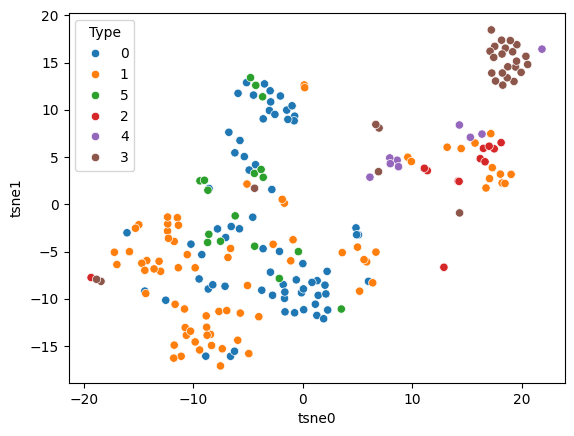

In [54]:
sns.scatterplot(data=embed_tnse, x='tsne0', y='tsne1', hue= 'Type')

In [61]:
params ={}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

gcv = GridSearchCV(lr, param_grid=params, cv= kfold, scoring='neg_log_loss')
embed_tnse = tsne.fit_transform(X)
gcv.fit(embed_tnse, y)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LogisticRegression(random_state=42), param_grid={},
             scoring='neg_log_loss')

In [63]:
print(gcv.best_params_)
print(gcv.best_score_)

{}
-1.229630009844584
